Now we will use our cleaned data to train some models. First we import our data and split off the response variable

In [141]:
import numpy as np
import pandas
from sklearn import preprocessing
from sklearn import model_selection


# imports data
senate_train = pandas.read_csv('senate_train.csv')
senate_test = pandas.read_csv('senate_test.csv')

senate_train = senate_train.values
senate_test = senate_test.values

y_train = senate_train[:,12]
X_train = senate_train[:,0:12]
y_test = senate_test[:,12]
X_test = senate_test[:,0:12]

Let's take a quick look at our data before we do anything else. The code below will generate histogram plots for both training and test data. Data from democratic victories are in blue, and Republican victories are in red. From a quick look at them, it is clear that our data is not linearly seperable in any one dimension. While this is not surprising, this also suggests that even in a high dimensional space, our data is also non-separable. Some dimensionality reduction will allow us to visualzie this more clearly, even in 2 dimensions we can see that the data is overlapping and doesn't have any clear decision linear or polynomial boundary. 

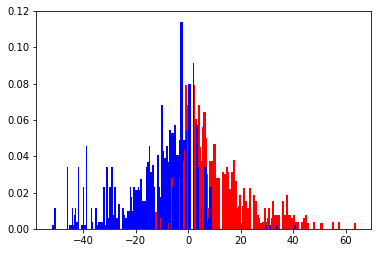

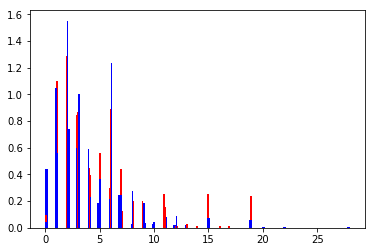

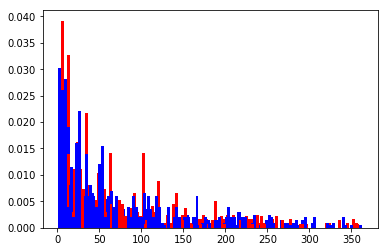

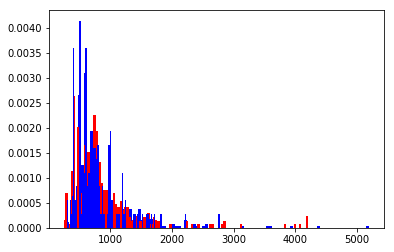

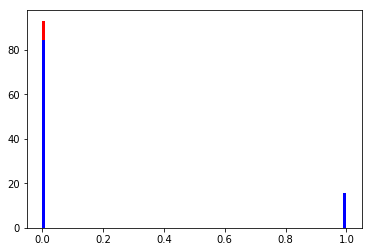

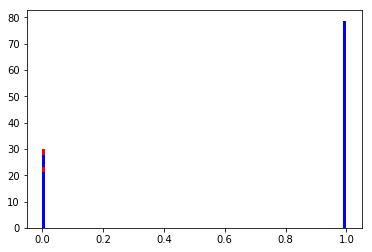

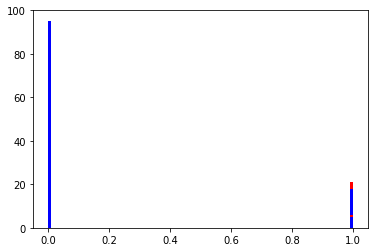

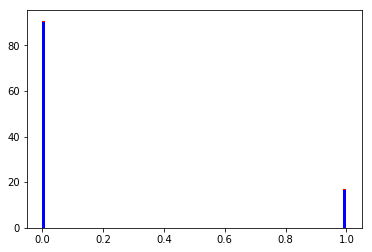

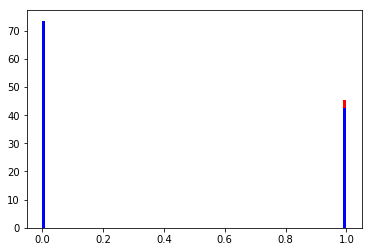

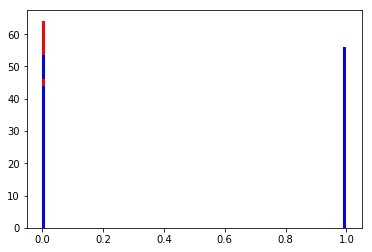

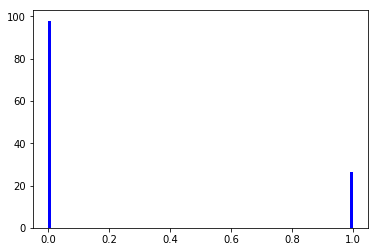

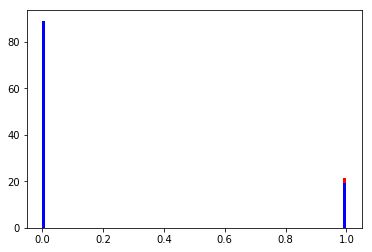

In [130]:
from matplotlib import pyplot as plt
for i in range(12):
    plt.hist(X_train[y_train == 1][:,i], bins = 100, density = True, color = 'red')
    plt.hist(X_train[y_train == 0][:,i], bins = 100, density = True, color = 'blue')
    plt.hist(X_test[y_test == 1][:,i], bins = 100, density = True, color = 'red')
    plt.hist(X_test[y_test == 0][:,i], bins = 100, density = True, color = 'blue')

    plt.show()



C:\Users\xon12\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


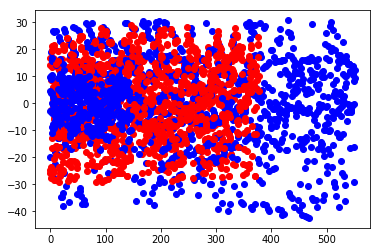

In [131]:
### Dimensionality reduction
from sklearn.manifold import TSNE
X_train_ld_r = TSNE(n_components=2).fit_transform(X_train[y_train ==1])
X_train_ld_d = TSNE(n_components=2).fit_transform(X_train[y_train ==0])
X_test_ld_r = TSNE(n_components=2).fit_transform(X_test[y_test == 1])
X_test_ld_d = TSNE(n_components=2).fit_transform(X_test[y_test == 0])

plt.plot(X_train_ld_r, 'ro')
plt.plot(X_train_ld_d, 'bo')
plt.plot(X_test_ld_r, 'ro')
plt.plot(X_test_ld_d, 'bo')
plt.show()

Now we will split our training sets into training and validation sets, using a 5-fold cross validation. Each of these sets train on 710 instances, and the validation sets have 177. 

In [119]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
split1, split2, split3, split4, split5 = kf.split(range(len(X_train)))
train1, valid1 = split1[0], split1[1]
train2, valid2 = split2[0], split2[1]
train3, valid3 = split3[0], split3[1]
train4, valid4 = split4[0], split4[1]
train5, valid5 = split5[0], split5[1]

The first model we'll train is a support vector classifier. We will use a gaussian RBF kernel, since our data is not llinearly separable, we want alot of flexibility in our classifier, since it will need to draw an irregular boundary around a high dimensional object. The RBF kernal enables this, by projecting our data to an infinite dimensional basis function, which is controlled by the 2 kernel parameters. Cost penalities control how much our model will attempt to avoid misclassifications, and the gamma parameter controls how much effect an individual point has on every other point. As this value approaches zero, our decision boundary becomes fit to each individual point, theortically perfectly classifying our training data. As it approaches infinity, we get a linear decision boundary. We created a sequence of values for gamma and C, and will use our cross validation procedure to find the optimal combination. 

In [34]:
from sklearn import metrics
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

gammas = [10000,1000,500,200,100,50,20,10,5,2,1,.5,.2,.1,.05,.02,.01,0.005,0.002,0.001,0.0001,0.00001]

### fits models for the data
s_best = 0
best_j = gammas[0]
best_i = 1
count = 0
for i in range(100):
    for j in range(22):
        count = count + 1
        model_SVM = SVC(C=i+1,gamma=gammas[j])
        model_SVM.fit(X_train[train1],y_train[train1])
        s1 = model_SVM.score(X_train[valid1],y_train[valid1])

        model_SVM.fit(X_train[train2],y_train[train2])
        s2 = model_SVM.score(X_train[valid2],y_train[valid2])

        model_SVM.fit(X_train[train3],y_train[train3])
        s3 = model_SVM.score(X_train[valid3],y_train[valid3])

        model_SVM.fit(X_train[train4],y_train[train4])
        s4 = model_SVM.score(X_train[valid4],y_train[valid4])

        model_SVM.fit(X_train[train5],y_train[train5])
        s5 = model_SVM.score(X_train[valid5],y_train[valid5])

        s_new = (s1 + s2 + s3 + s4 + s5)/5
        if s_new > s_best:
            s_best = s_new
            best_j = gammas[j]
            best_i = i+1
        print("{}\tValidation accuracy: {:.6f}""\tBest accuracy: {:.6f}""\tBest Variance: {:.6f}""\tBest Cost: {:.6f}".format(count, s_new, s_best, best_j, best_i))

1	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
2	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
3	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
4	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
5	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
6	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
7	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
8	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
9	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Variance: 10000.000000	Best Cost: 1.000000
10	Validation accuracy: 0.621736	Best accuracy: 0.621736	Best Va

82	Validation accuracy: 0.611756	Best accuracy: 0.671840	Best Variance: 0.001000	Best Cost: 3.000000
83	Validation accuracy: 0.620891	Best accuracy: 0.671840	Best Variance: 0.001000	Best Cost: 3.000000
84	Validation accuracy: 0.648035	Best accuracy: 0.671840	Best Variance: 0.001000	Best Cost: 3.000000
85	Validation accuracy: 0.674094	Best accuracy: 0.674094	Best Variance: 0.002000	Best Cost: 4.000000
86	Validation accuracy: 0.670742	Best accuracy: 0.674094	Best Variance: 0.002000	Best Cost: 4.000000
87	Validation accuracy: 0.642474	Best accuracy: 0.674094	Best Variance: 0.002000	Best Cost: 4.000000
88	Validation accuracy: 0.619844	Best accuracy: 0.674094	Best Variance: 0.002000	Best Cost: 4.000000
89	Validation accuracy: 0.621736	Best accuracy: 0.674094	Best Variance: 0.002000	Best Cost: 4.000000
90	Validation accuracy: 0.621736	Best accuracy: 0.674094	Best Variance: 0.002000	Best Cost: 4.000000
91	Validation accuracy: 0.621736	Best accuracy: 0.674094	Best Variance: 0.002000	Best Cost:

163	Validation accuracy: 0.621736	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
164	Validation accuracy: 0.621736	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
165	Validation accuracy: 0.620612	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
166	Validation accuracy: 0.622872	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
167	Validation accuracy: 0.617254	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
168	Validation accuracy: 0.606024	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
169	Validation accuracy: 0.613940	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
170	Validation accuracy: 0.616283	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
171	Validation accuracy: 0.619761	Best accuracy: 0.683127	Best Variance: 0.002000	Best Cost: 5.000000
172	Validation accuracy: 0.645775	Best accuracy: 0.683127	Best Variance: 0.002000	

244	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
245	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
246	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
247	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
248	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
249	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
250	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
251	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
252	Validation accuracy: 0.621736	Best accuracy: 0.687679	Best Variance: 0.001000	Best Cost: 10.000000
253	Validation accuracy: 0.620612	Best accuracy: 0.687679	Best Variance: 

324	Validation accuracy: 0.617419	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
325	Validation accuracy: 0.624268	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
326	Validation accuracy: 0.648029	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
327	Validation accuracy: 0.675243	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
328	Validation accuracy: 0.689919	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
329	Validation accuracy: 0.653831	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
330	Validation accuracy: 0.645896	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
331	Validation accuracy: 0.621736	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
332	Validation accuracy: 0.621736	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
333	Validation accuracy: 0.621736	Best accuracy: 0.692186	Best Variance: 

404	Validation accuracy: 0.621736	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
405	Validation accuracy: 0.621736	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
406	Validation accuracy: 0.621736	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
407	Validation accuracy: 0.620612	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
408	Validation accuracy: 0.622872	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
409	Validation accuracy: 0.617254	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
410	Validation accuracy: 0.606024	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
411	Validation accuracy: 0.613940	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
412	Validation accuracy: 0.617419	Best accuracy: 0.692186	Best Variance: 0.001000	Best Cost: 12.000000
413	Validation accuracy: 0.626528	Best accuracy: 0.692186	Best Variance: 

484	Validation accuracy: 0.657164	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
485	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
486	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
487	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
488	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
489	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
490	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
491	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
492	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 0.001000	Best Cost: 22.000000
493	Validation accuracy: 0.621736	Best accuracy: 0.693328	Best Variance: 

564	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
565	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
566	Validation accuracy: 0.617419	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
567	Validation accuracy: 0.624281	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
568	Validation accuracy: 0.648016	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
569	Validation accuracy: 0.677477	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
570	Validation accuracy: 0.691068	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
571	Validation accuracy: 0.675256	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
572	Validation accuracy: 0.656053	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
573	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 

644	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
645	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
646	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
647	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
648	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
649	Validation accuracy: 0.620612	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
650	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
651	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
652	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
653	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 

724	Validation accuracy: 0.688808	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
725	Validation accuracy: 0.676392	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
726	Validation accuracy: 0.653806	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
727	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
728	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
729	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
730	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
731	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
732	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
733	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 

804	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
805	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
806	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
807	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
808	Validation accuracy: 0.617419	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
809	Validation accuracy: 0.627671	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
810	Validation accuracy: 0.650263	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
811	Validation accuracy: 0.678595	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
812	Validation accuracy: 0.687679	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
813	Validation accuracy: 0.679775	Best accuracy: 0.694458	Best Variance: 

884	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
885	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
886	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
887	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
888	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
889	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
890	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
891	Validation accuracy: 0.620612	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
892	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
893	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 

964	Validation accuracy: 0.651393	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
965	Validation accuracy: 0.678595	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
966	Validation accuracy: 0.688808	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
967	Validation accuracy: 0.679782	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
968	Validation accuracy: 0.659462	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
969	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
970	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
971	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
972	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
973	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 

1044	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1045	Validation accuracy: 0.620612	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1046	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1047	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1048	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1049	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1050	Validation accuracy: 0.617419	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1051	Validation accuracy: 0.625417	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1052	Validation accuracy: 0.650263	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1053	Validation accuracy: 0.677471	Best accuracy: 0.694458	Best 

1123	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1124	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1125	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1126	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1127	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1128	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1129	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1130	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1131	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1132	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best 

1202	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1203	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1204	Validation accuracy: 0.617419	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1205	Validation accuracy: 0.625417	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1206	Validation accuracy: 0.649133	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1207	Validation accuracy: 0.676328	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1208	Validation accuracy: 0.688808	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1209	Validation accuracy: 0.682016	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1210	Validation accuracy: 0.657221	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1211	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best 

1281	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1282	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1283	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1284	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1285	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1286	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1287	Validation accuracy: 0.620612	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1288	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1289	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1290	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best 

1360	Validation accuracy: 0.649140	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1361	Validation accuracy: 0.677452	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1362	Validation accuracy: 0.685431	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1363	Validation accuracy: 0.684282	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1364	Validation accuracy: 0.661728	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1365	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1366	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1367	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1368	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1369	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best 

1439	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1440	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1441	Validation accuracy: 0.620612	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1442	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1443	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1444	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1445	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1446	Validation accuracy: 0.617419	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1447	Validation accuracy: 0.625417	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1448	Validation accuracy: 0.648016	Best accuracy: 0.694458	Best 

1519	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1520	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1521	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1522	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1523	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1524	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1525	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1526	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1527	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1528	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best 

1598	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1599	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1600	Validation accuracy: 0.617419	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1601	Validation accuracy: 0.625417	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1602	Validation accuracy: 0.648016	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1603	Validation accuracy: 0.679705	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1604	Validation accuracy: 0.687672	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1605	Validation accuracy: 0.685412	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1606	Validation accuracy: 0.662858	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1607	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best 

1677	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1678	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1679	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1680	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1681	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1682	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1683	Validation accuracy: 0.620612	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1684	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1685	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1686	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best 

1756	Validation accuracy: 0.646893	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1757	Validation accuracy: 0.678588	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1758	Validation accuracy: 0.688802	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1759	Validation accuracy: 0.686542	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1760	Validation accuracy: 0.662864	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1761	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1762	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1763	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1764	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1765	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best 

1835	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1836	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1837	Validation accuracy: 0.620612	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1838	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1839	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1840	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1841	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1842	Validation accuracy: 0.617419	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1843	Validation accuracy: 0.625417	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1844	Validation accuracy: 0.646893	Best accuracy: 0.694458	Best 

1915	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1916	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1917	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1918	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1919	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1920	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1921	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1922	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1923	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1924	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best 

1994	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1995	Validation accuracy: 0.613940	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1996	Validation accuracy: 0.617419	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1997	Validation accuracy: 0.625417	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1998	Validation accuracy: 0.645769	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
1999	Validation accuracy: 0.679718	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2000	Validation accuracy: 0.682029	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2001	Validation accuracy: 0.689919	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2002	Validation accuracy: 0.660604	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2003	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best 

2073	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2074	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2075	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2076	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2077	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2078	Validation accuracy: 0.621736	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2079	Validation accuracy: 0.620612	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2080	Validation accuracy: 0.622872	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2081	Validation accuracy: 0.617254	Best accuracy: 0.694458	Best Variance: 0.001000	Best Cost: 25.000000
2082	Validation accuracy: 0.606024	Best accuracy: 0.694458	Best 

2152	Validation accuracy: 0.645775	Best accuracy: 0.695569	Best Variance: 0.000100	Best Cost: 97.000000
2153	Validation accuracy: 0.677458	Best accuracy: 0.695569	Best Variance: 0.000100	Best Cost: 97.000000
2154	Validation accuracy: 0.683159	Best accuracy: 0.695569	Best Variance: 0.000100	Best Cost: 97.000000
2155	Validation accuracy: 0.697823	Best accuracy: 0.697823	Best Variance: 0.000100	Best Cost: 98.000000
2156	Validation accuracy: 0.663994	Best accuracy: 0.697823	Best Variance: 0.000100	Best Cost: 98.000000
2157	Validation accuracy: 0.621736	Best accuracy: 0.697823	Best Variance: 0.000100	Best Cost: 98.000000
2158	Validation accuracy: 0.621736	Best accuracy: 0.697823	Best Variance: 0.000100	Best Cost: 98.000000
2159	Validation accuracy: 0.621736	Best accuracy: 0.697823	Best Variance: 0.000100	Best Cost: 98.000000
2160	Validation accuracy: 0.621736	Best accuracy: 0.697823	Best Variance: 0.000100	Best Cost: 98.000000
2161	Validation accuracy: 0.621736	Best accuracy: 0.697823	Best 

Our optimal parameters are a penalty of 98, and a gamma parameter of 0.0001. This means that our boundary is highly irregular, as we expected due to the overlapping features of the data. We find that we have a test accuracy of 0.6431297709923665, and an AUC of 0.7916666666666667. The ROC curve is shown below. While this is not a fantastic result, it is noticeable better than a random classifier. 

Test Accuracy: 0.6431297709923665
AUC: 0.7916666666666667


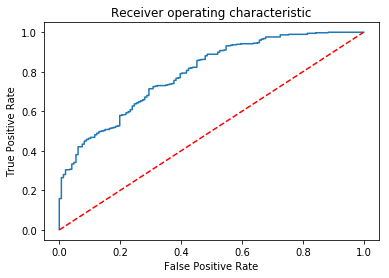

In [138]:
### fits model to entire training data and then generates predicted values for test set
### returns ROC plots, and accuracy
model_SVM = SVC(C=98,gamma=0.0001)
model_SVM.fit(X_train,y_train)
fpr, tpr, _ = metrics.roc_curve(y_test,model_SVM.decision_function(X_test))

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color = 'red',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print("Test Accuracy:", model_SVM.score(X_test,y_test))
print("AUC:", roc_auc_score(y_test,model_SVM.decision_function(X_test)))

The next model we will use is a neural network. We will use a multilayer deep neural network via tensorflow.

Before we can actually build the neural net, we will build a class of functions (the code for which is taken from our textbook) to define the neural net in a way that is similar to sklearn models. This will allow us to run a hyperparameter search to determine the best set of parameters for our neural net. 

In [120]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError
from sklearn.metrics import accuracy_score
import tensorflow as tf
### book code to build a class of functions for parameter searching

class DNNClassifier(BaseEstimator, ClassifierMixin):
    

    def __init__(self, n_hidden_layers=5, n_neurons=100, optimizer_class=tf.train.AdamOptimizer,
                 learning_rate=0.01, batch_size=20, activation=tf.nn.elu, initializer=he_init,
                 batch_norm_momentum=None, dropout_rate=None, random_state=None):
        """Initialize the DNNClassifier by simply storing all the hyperparameters."""
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.random_state = random_state
        self._session = None


    def _dnn(self, inputs):
        """Build the hidden layers, with support for batch normalization and dropout."""
        for layer in range(self.n_hidden_layers):
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, self.dropout_rate, training=self._training)
            inputs = tf.layers.dense(inputs, self.n_neurons,
                                     kernel_initializer=self.initializer,
                                     name="hidden%d" % (layer + 1))
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.batch_norm_momentum,
                                                       training=self._training)
            inputs = self.activation(inputs, name="hidden%d_out" % (layer + 1))
        return inputs


    def _build_graph(self, n_inputs, n_outputs):
        """Build the same model as earlier"""
        if self.random_state is not None:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)

        X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y = tf.placeholder(tf.int32, shape= (None), name="y")

        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name='training')
        else:
            self._training = None

        dnn_outputs = self._dnn(X)

        logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")

        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

        optimizer = self.optimizer_class(learning_rate=self.learning_rate)
        training_op = optimizer.minimize(loss)

        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

        # Make the important operations available easily through instance variables
        self._X, self._y = X, y
        self._Y_proba, self._loss = Y_proba, loss
        self._training_op, self._accuracy = training_op, accuracy
        self._init, self._saver = init, saver

    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_params(self):
        """Get all variable values (used for early stopping, faster than saving to disk)"""
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        return {gvar.op.name: value for gvar, value in zip(gvars, self._session.run(gvars))}

    def _restore_model_params(self, model_params):
        """Set all variables to the given values (for early stopping, faster than loading from disk)"""
        gvar_names = list(model_params.keys())
        assign_ops = {gvar_name: self._graph.get_operation_by_name(gvar_name + "/Assign")
                      for gvar_name in gvar_names}
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        self._session.run(assign_ops, feed_dict=feed_dict)

    def fit(self, X, y, n_epochs=100, X_valid=None, y_valid=None):
        """Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)
        
        self.class_to_index_ = {label: index
                                for index, label in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label]
                      for label in y], dtype=np.int32)
        
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)
            # extra ops for batch normalization
            extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

        # needed in case of early stopping
        max_checks_without_progress = 20
        checks_without_progress = 0
        best_loss = np.infty
        best_params = None
        
        # Now train the model!
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            self._init.run()
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(len(X))
                for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    sess.run(self._training_op, feed_dict=feed_dict)
                    if extra_update_ops:
                        sess.run(extra_update_ops, feed_dict=feed_dict)
                if X_valid is not None and y_valid is not None:
                    loss_val, acc_val = sess.run([self._loss, self._accuracy], feed_dict={self._X: X_valid, self._y: y_valid})
                    if loss_val < best_loss:
                        best_params = self._get_model_params()
                        best_loss = loss_val
                        checks_without_progress = 0
                    else:
                        checks_without_progress += 1
                    print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_val, best_loss, acc_val * 100))
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
                else:
                    loss_train, acc_train = sess.run([self._loss, self._accuracy], feed_dict={self._X: X_batch, self._y: y_batch})
                    print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_train, acc_train * 100))
            # If we used early stopping then rollback to the best model found
            if best_params:
                self._restore_model_params(best_params)
            return self

    def predict_proba(self, X):
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" % self.__class__.__name__)
        with self._session.as_default() as sess:
            return self._Y_proba.eval(feed_dict={self._X: X})

    def predict(self, X):
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        return np.array([[self.classes_[class_index]]
                         for class_index in class_indices], np.int32)

    def save(self, path):
        self._saver.save(self._session, path)

Now that we have a class of functions to hyperparameter search over, we are prepared to actually perform our hyperparameter search. We will look at ELU and hyberbolic tangent activation functions, as well as various configurations of neuron numbers, batch sizes and layers numbers. We will use He initialization and an Adams optimizer, with a series of possible learning rates. We also use early stopping, so if our model's loss (we are optimizing off of binary cross entropy), does not improve after 20 steps, we will switch to the next hyperparameter. 

We then normalize and scale the data, so that the differences in the scales and distributions between features are no longer relevent. Neural nets without this tend to perform poorly. We will use the first train/validation split from the SVC for our training and validation sets.

In [142]:
X_train = preprocessing.normalize(X_train)
X_train = preprocessing.scale(X_train)

X_test = preprocessing.normalize(X_test)
X_test = preprocessing.scale(X_test)

X_train1, X_valid = X_train[train1], X_train[valid1]
y_train1, y_valid = y_train[train1], y_train[valid1]

In [123]:




from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_neurons": [10,25, 50, 100, 250,500],
    "n_hidden_layers": [1,5,10,25],
    "batch_size": [10, 25, 50, 75, 100],
    "learning_rate": [0.01, 0.05, 0.1],
    "activation": [tf.nn.tanh, tf.nn.elu],
}

rnd_search = RandomizedSearchCV(DNNClassifier(random_state=47), param_distribs, n_iter=50, random_state=47, verbose=2)
rnd_search.fit(X_train1, y_train1, X_valid=X_valid, y_valid=y_valid, n_epochs=1000)

rnd_search.best_estimator_.save("./ML_final_project")






Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_neurons=25, n_hidden_layers=1, learning_rate=0.01, batch_size=50, activation=<function elu at 0x000001EF6A971620> 
0	Validation loss: 0.512618	Best loss: 0.512618	Accuracy: 76.97%
1	Validation loss: 0.557450	Best loss: 0.512618	Accuracy: 67.98%
2	Validation loss: 0.462066	Best loss: 0.462066	Accuracy: 76.97%
3	Validation loss: 0.507198	Best loss: 0.462066	Accuracy: 73.03%
4	Validation loss: 0.483727	Best loss: 0.462066	Accuracy: 74.72%
5	Validation loss: 0.517790	Best loss: 0.462066	Accuracy: 73.03%
6	Validation loss: 0.463387	Best loss: 0.462066	Accuracy: 75.84%
7	Validation loss: 0.454411	Best loss: 0.454411	Accuracy: 75.84%
8	Validation loss: 0.507383	Best loss: 0.454411	Accuracy: 71.91%
9	Validation loss: 0.434196	Best loss: 0.434196	Accuracy: 78.65%
10	Validation loss: 0.451548	Best loss: 0.434196	Accuracy: 76.40%
11	Validation loss: 0.474965	Best loss: 0.434196	Accuracy: 74.16%
12	Validation loss: 0.450097	Best 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


0	Validation loss: 0.398720	Best loss: 0.398720	Accuracy: 82.02%
1	Validation loss: 0.384191	Best loss: 0.384191	Accuracy: 82.02%
2	Validation loss: 0.326451	Best loss: 0.326451	Accuracy: 87.08%
3	Validation loss: 0.340810	Best loss: 0.326451	Accuracy: 80.90%
4	Validation loss: 0.319368	Best loss: 0.319368	Accuracy: 86.52%
5	Validation loss: 0.325842	Best loss: 0.319368	Accuracy: 82.58%
6	Validation loss: 0.321725	Best loss: 0.319368	Accuracy: 84.83%
7	Validation loss: 0.339103	Best loss: 0.319368	Accuracy: 84.83%
8	Validation loss: 0.322845	Best loss: 0.319368	Accuracy: 85.96%
9	Validation loss: 0.337882	Best loss: 0.319368	Accuracy: 84.27%
10	Validation loss: 0.322054	Best loss: 0.319368	Accuracy: 85.39%
11	Validation loss: 0.322231	Best loss: 0.319368	Accuracy: 85.39%
12	Validation loss: 0.324736	Best loss: 0.319368	Accuracy: 84.83%
13	Validation loss: 0.337970	Best loss: 0.319368	Accuracy: 84.83%
14	Validation loss: 0.359564	Best loss: 0.319368	Accuracy: 84.27%
15	Validation loss: 

14	Validation loss: 4.386271	Best loss: 0.599314	Accuracy: 56.74%
15	Validation loss: 3.630839	Best loss: 0.599314	Accuracy: 57.30%
16	Validation loss: 1.008886	Best loss: 0.599314	Accuracy: 57.30%
17	Validation loss: 2.095402	Best loss: 0.599314	Accuracy: 57.30%
18	Validation loss: 0.703976	Best loss: 0.599314	Accuracy: 56.74%
19	Validation loss: 1.023433	Best loss: 0.599314	Accuracy: 56.74%
20	Validation loss: 1.221021	Best loss: 0.599314	Accuracy: 56.74%
21	Validation loss: 1.003572	Best loss: 0.599314	Accuracy: 43.26%
22	Validation loss: 0.709565	Best loss: 0.599314	Accuracy: 43.26%
23	Validation loss: 0.526612	Best loss: 0.526612	Accuracy: 83.15%
24	Validation loss: 0.540560	Best loss: 0.526612	Accuracy: 56.74%
25	Validation loss: 1.174400	Best loss: 0.526612	Accuracy: 58.99%
26	Validation loss: 0.666129	Best loss: 0.526612	Accuracy: 58.99%
27	Validation loss: 0.921447	Best loss: 0.526612	Accuracy: 41.01%
28	Validation loss: 0.860161	Best loss: 0.526612	Accuracy: 58.43%
29	Validat

19	Validation loss: 0.373864	Best loss: 0.301745	Accuracy: 82.58%
20	Validation loss: 0.414533	Best loss: 0.301745	Accuracy: 82.58%
21	Validation loss: 0.518618	Best loss: 0.301745	Accuracy: 83.15%
22	Validation loss: 0.382255	Best loss: 0.301745	Accuracy: 84.27%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=1, learning_rate=0.1, batch_size=25, activation=<function tanh at 0x000001EF6AB73B70>, total=   0.4s
[CV] n_neurons=10, n_hidden_layers=1, learning_rate=0.1, batch_size=25, activation=<function tanh at 0x000001EF6AB73B70> 
0	Validation loss: 0.292424	Best loss: 0.292424	Accuracy: 89.89%
1	Validation loss: 0.362114	Best loss: 0.292424	Accuracy: 83.71%
2	Validation loss: 0.291806	Best loss: 0.291806	Accuracy: 88.76%
3	Validation loss: 0.368098	Best loss: 0.291806	Accuracy: 80.90%
4	Validation loss: 0.335009	Best loss: 0.291806	Accuracy: 81.46%
5	Validation loss: 0.385579	Best loss: 0.291806	Accuracy: 82.58%
6	Validation loss: 0.291194	Best loss: 0.291194	Accuracy: 87.64%
7	Vali

0	Validation loss: 0.354005	Best loss: 0.354005	Accuracy: 85.39%
1	Validation loss: 0.359169	Best loss: 0.354005	Accuracy: 83.15%
2	Validation loss: 0.291605	Best loss: 0.291605	Accuracy: 90.45%
3	Validation loss: 0.337971	Best loss: 0.291605	Accuracy: 87.08%
4	Validation loss: 0.337107	Best loss: 0.291605	Accuracy: 87.08%
5	Validation loss: 0.323920	Best loss: 0.291605	Accuracy: 88.20%
6	Validation loss: 0.325276	Best loss: 0.291605	Accuracy: 86.52%
7	Validation loss: 0.250310	Best loss: 0.250310	Accuracy: 90.45%
8	Validation loss: 0.419567	Best loss: 0.250310	Accuracy: 84.27%
9	Validation loss: 0.327124	Best loss: 0.250310	Accuracy: 88.76%
10	Validation loss: 0.242938	Best loss: 0.242938	Accuracy: 89.89%
11	Validation loss: 0.256558	Best loss: 0.242938	Accuracy: 90.45%
12	Validation loss: 0.269790	Best loss: 0.242938	Accuracy: 89.33%
13	Validation loss: 0.340117	Best loss: 0.242938	Accuracy: 85.96%
14	Validation loss: 0.422782	Best loss: 0.242938	Accuracy: 84.83%
15	Validation loss: 

[CV] n_neurons=25, n_hidden_layers=1, learning_rate=0.01, batch_size=75, activation=<function tanh at 0x000001EF6AB73B70> 
0	Validation loss: 0.568102	Best loss: 0.568102	Accuracy: 66.85%
1	Validation loss: 0.550952	Best loss: 0.550952	Accuracy: 69.66%
2	Validation loss: 0.523416	Best loss: 0.523416	Accuracy: 68.54%
3	Validation loss: 0.539825	Best loss: 0.523416	Accuracy: 69.10%
4	Validation loss: 0.523434	Best loss: 0.523416	Accuracy: 70.22%
5	Validation loss: 0.525763	Best loss: 0.523416	Accuracy: 70.22%
6	Validation loss: 0.496096	Best loss: 0.496096	Accuracy: 71.35%
7	Validation loss: 0.478558	Best loss: 0.478558	Accuracy: 74.72%
8	Validation loss: 0.522414	Best loss: 0.478558	Accuracy: 70.79%
9	Validation loss: 0.476585	Best loss: 0.476585	Accuracy: 74.72%
10	Validation loss: 0.454940	Best loss: 0.454940	Accuracy: 76.40%
11	Validation loss: 0.481375	Best loss: 0.454940	Accuracy: 74.72%
12	Validation loss: 0.485518	Best loss: 0.454940	Accuracy: 74.72%
13	Validation loss: 0.507617	

0	Validation loss: 2.185251	Best loss: 2.185251	Accuracy: 16.85%
1	Validation loss: 0.589744	Best loss: 0.589744	Accuracy: 82.58%
2	Validation loss: 0.616135	Best loss: 0.589744	Accuracy: 64.61%
3	Validation loss: 0.481957	Best loss: 0.481957	Accuracy: 83.71%
4	Validation loss: 0.667634	Best loss: 0.481957	Accuracy: 76.97%
5	Validation loss: 0.808356	Best loss: 0.481957	Accuracy: 16.85%
6	Validation loss: 0.657954	Best loss: 0.481957	Accuracy: 73.60%
7	Validation loss: 0.450491	Best loss: 0.450491	Accuracy: 87.64%
8	Validation loss: 0.364886	Best loss: 0.364886	Accuracy: 87.08%
9	Validation loss: 0.468382	Best loss: 0.364886	Accuracy: 83.15%
10	Validation loss: 0.782999	Best loss: 0.364886	Accuracy: 17.42%
11	Validation loss: 0.733184	Best loss: 0.364886	Accuracy: 21.35%
12	Validation loss: 0.918744	Best loss: 0.364886	Accuracy: 28.09%
13	Validation loss: 0.766558	Best loss: 0.364886	Accuracy: 34.83%
14	Validation loss: 0.590203	Best loss: 0.364886	Accuracy: 78.65%
15	Validation loss: 

35	Validation loss: 0.331572	Best loss: 0.304033	Accuracy: 84.27%
36	Validation loss: 0.333483	Best loss: 0.304033	Accuracy: 85.39%
37	Validation loss: 0.344966	Best loss: 0.304033	Accuracy: 82.58%
38	Validation loss: 0.317231	Best loss: 0.304033	Accuracy: 83.15%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=1, learning_rate=0.01, batch_size=50, activation=<function elu at 0x000001EF6A971620>, total=   0.4s
[CV] n_neurons=10, n_hidden_layers=1, learning_rate=0.01, batch_size=50, activation=<function elu at 0x000001EF6A971620> 
0	Validation loss: 0.495188	Best loss: 0.495188	Accuracy: 86.52%
1	Validation loss: 0.384337	Best loss: 0.384337	Accuracy: 88.20%
2	Validation loss: 0.361955	Best loss: 0.361955	Accuracy: 88.20%
3	Validation loss: 0.367323	Best loss: 0.361955	Accuracy: 85.96%
4	Validation loss: 0.353155	Best loss: 0.353155	Accuracy: 87.08%
5	Validation loss: 0.331883	Best loss: 0.331883	Accuracy: 87.64%
6	Validation loss: 0.316919	Best loss: 0.316919	Accuracy: 88.20%
7	Vali

15	Validation loss: 0.533070	Best loss: 0.451564	Accuracy: 54.49%
16	Validation loss: 0.503677	Best loss: 0.451564	Accuracy: 83.15%
17	Validation loss: 0.568936	Best loss: 0.451564	Accuracy: 83.15%
18	Validation loss: 0.612762	Best loss: 0.451564	Accuracy: 83.15%
19	Validation loss: 0.622477	Best loss: 0.451564	Accuracy: 83.15%
20	Validation loss: 0.611551	Best loss: 0.451564	Accuracy: 83.15%
21	Validation loss: 0.615832	Best loss: 0.451564	Accuracy: 83.15%
22	Validation loss: 0.592878	Best loss: 0.451564	Accuracy: 83.15%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=25, learning_rate=0.01, batch_size=10, activation=<function elu at 0x000001EF6A971620>, total=   3.3s
[CV] n_neurons=10, n_hidden_layers=25, learning_rate=0.01, batch_size=10, activation=<function elu at 0x000001EF6A971620> 
0	Validation loss: 0.580607	Best loss: 0.580607	Accuracy: 83.15%
1	Validation loss: 0.553151	Best loss: 0.553151	Accuracy: 83.15%
2	Validation loss: 0.604266	Best loss: 0.553151	Accuracy: 64.61%


37	Validation loss: 0.520492	Best loss: 0.520492	Accuracy: 71.91%
38	Validation loss: 0.621426	Best loss: 0.520492	Accuracy: 67.98%
39	Validation loss: 0.599135	Best loss: 0.520492	Accuracy: 66.29%
40	Validation loss: 0.899816	Best loss: 0.520492	Accuracy: 57.87%
41	Validation loss: 0.652449	Best loss: 0.520492	Accuracy: 66.29%
42	Validation loss: 0.576082	Best loss: 0.520492	Accuracy: 69.10%
43	Validation loss: 0.698676	Best loss: 0.520492	Accuracy: 59.55%
44	Validation loss: 0.850507	Best loss: 0.520492	Accuracy: 56.18%
45	Validation loss: 0.570303	Best loss: 0.520492	Accuracy: 69.10%
46	Validation loss: 1.075725	Best loss: 0.520492	Accuracy: 49.44%
47	Validation loss: 0.688533	Best loss: 0.520492	Accuracy: 66.85%
48	Validation loss: 0.675862	Best loss: 0.520492	Accuracy: 66.85%
49	Validation loss: 1.053935	Best loss: 0.520492	Accuracy: 51.12%
50	Validation loss: 0.656973	Best loss: 0.520492	Accuracy: 67.42%
51	Validation loss: 0.708807	Best loss: 0.520492	Accuracy: 65.17%
52	Validat

16	Validation loss: 0.515866	Best loss: 0.450374	Accuracy: 83.15%
17	Validation loss: 0.540933	Best loss: 0.450374	Accuracy: 83.15%
18	Validation loss: 0.602336	Best loss: 0.450374	Accuracy: 83.15%
19	Validation loss: 0.660654	Best loss: 0.450374	Accuracy: 83.15%
20	Validation loss: 0.655734	Best loss: 0.450374	Accuracy: 83.15%
21	Validation loss: 0.625790	Best loss: 0.450374	Accuracy: 83.15%
22	Validation loss: 0.592235	Best loss: 0.450374	Accuracy: 83.15%
23	Validation loss: 0.579560	Best loss: 0.450374	Accuracy: 83.15%
24	Validation loss: 0.586273	Best loss: 0.450374	Accuracy: 83.15%
25	Validation loss: 0.606252	Best loss: 0.450374	Accuracy: 83.15%
26	Validation loss: 0.612768	Best loss: 0.450374	Accuracy: 83.15%
27	Validation loss: 0.613103	Best loss: 0.450374	Accuracy: 83.15%
28	Validation loss: 0.618262	Best loss: 0.450374	Accuracy: 83.15%
29	Validation loss: 0.610584	Best loss: 0.450374	Accuracy: 83.15%
30	Validation loss: 0.590690	Best loss: 0.450374	Accuracy: 83.15%
Early stop

0	Validation loss: 0.617218	Best loss: 0.617218	Accuracy: 68.54%
1	Validation loss: 0.430126	Best loss: 0.430126	Accuracy: 78.09%
2	Validation loss: 0.443818	Best loss: 0.430126	Accuracy: 76.97%
3	Validation loss: 0.603217	Best loss: 0.430126	Accuracy: 69.66%
4	Validation loss: 0.535894	Best loss: 0.430126	Accuracy: 70.22%
5	Validation loss: 0.455698	Best loss: 0.430126	Accuracy: 75.28%
6	Validation loss: 0.393640	Best loss: 0.393640	Accuracy: 79.21%
7	Validation loss: 0.555075	Best loss: 0.393640	Accuracy: 66.29%
8	Validation loss: 0.590740	Best loss: 0.393640	Accuracy: 66.29%
9	Validation loss: 0.404482	Best loss: 0.393640	Accuracy: 79.21%
10	Validation loss: 0.424691	Best loss: 0.393640	Accuracy: 79.78%
11	Validation loss: 0.507383	Best loss: 0.393640	Accuracy: 70.79%
12	Validation loss: 0.514496	Best loss: 0.393640	Accuracy: 72.47%
13	Validation loss: 0.517627	Best loss: 0.393640	Accuracy: 72.47%
14	Validation loss: 0.446191	Best loss: 0.393640	Accuracy: 74.72%
15	Validation loss: 

0	Validation loss: 0.349197	Best loss: 0.349197	Accuracy: 82.58%
1	Validation loss: 0.364720	Best loss: 0.349197	Accuracy: 84.83%
2	Validation loss: 0.368444	Best loss: 0.349197	Accuracy: 84.83%
3	Validation loss: 0.314501	Best loss: 0.314501	Accuracy: 86.52%
4	Validation loss: 0.311449	Best loss: 0.311449	Accuracy: 87.08%
5	Validation loss: 0.302017	Best loss: 0.302017	Accuracy: 88.76%
6	Validation loss: 0.309395	Best loss: 0.302017	Accuracy: 88.76%
7	Validation loss: 0.337739	Best loss: 0.302017	Accuracy: 84.27%
8	Validation loss: 0.328905	Best loss: 0.302017	Accuracy: 85.96%
9	Validation loss: 0.339537	Best loss: 0.302017	Accuracy: 85.96%
10	Validation loss: 0.389391	Best loss: 0.302017	Accuracy: 80.34%
11	Validation loss: 0.377774	Best loss: 0.302017	Accuracy: 83.15%
12	Validation loss: 0.355072	Best loss: 0.302017	Accuracy: 82.58%
13	Validation loss: 0.327429	Best loss: 0.302017	Accuracy: 85.39%
14	Validation loss: 0.424020	Best loss: 0.302017	Accuracy: 81.46%
15	Validation loss: 

32	Validation loss: 0.773222	Best loss: 0.272818	Accuracy: 70.22%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=1, learning_rate=0.05, batch_size=10, activation=<function elu at 0x000001EF6A971620>, total=   1.6s
[CV] n_neurons=25, n_hidden_layers=1, learning_rate=0.1, batch_size=25, activation=<function tanh at 0x000001EF6AB73B70> 
0	Validation loss: 0.390031	Best loss: 0.390031	Accuracy: 80.34%
1	Validation loss: 0.342378	Best loss: 0.342378	Accuracy: 85.96%
2	Validation loss: 0.645691	Best loss: 0.342378	Accuracy: 76.97%
3	Validation loss: 0.839072	Best loss: 0.342378	Accuracy: 70.22%
4	Validation loss: 0.811076	Best loss: 0.342378	Accuracy: 73.60%
5	Validation loss: 0.640812	Best loss: 0.342378	Accuracy: 73.03%
6	Validation loss: 0.984355	Best loss: 0.342378	Accuracy: 67.98%
7	Validation loss: 0.724679	Best loss: 0.342378	Accuracy: 76.40%
8	Validation loss: 0.711827	Best loss: 0.342378	Accuracy: 74.72%
9	Validation loss: 0.716788	Best loss: 0.342378	Accuracy: 78.65%
10	Valida

17	Validation loss: 0.621839	Best loss: 0.545717	Accuracy: 83.15%
18	Validation loss: 0.593896	Best loss: 0.545717	Accuracy: 60.11%
19	Validation loss: 0.614834	Best loss: 0.545717	Accuracy: 60.11%
20	Validation loss: 0.822642	Best loss: 0.545717	Accuracy: 39.89%
21	Validation loss: 0.677798	Best loss: 0.545717	Accuracy: 60.11%
22	Validation loss: 0.582761	Best loss: 0.545717	Accuracy: 60.11%
23	Validation loss: 0.546482	Best loss: 0.545717	Accuracy: 83.15%
24	Validation loss: 0.610460	Best loss: 0.545717	Accuracy: 60.11%
25	Validation loss: 1.008659	Best loss: 0.545717	Accuracy: 39.89%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=10, learning_rate=0.05, batch_size=10, activation=<function tanh at 0x000001EF6AB73B70>, total=   4.5s
[CV] n_neurons=50, n_hidden_layers=10, learning_rate=0.05, batch_size=10, activation=<function tanh at 0x000001EF6AB73B70> 
0	Validation loss: 0.901182	Best loss: 0.901182	Accuracy: 50.00%
1	Validation loss: 0.859176	Best loss: 0.859176	Accuracy: 52.8

28	Validation loss: 0.595397	Best loss: 0.453786	Accuracy: 83.15%
29	Validation loss: 1.591511	Best loss: 0.453786	Accuracy: 16.85%
30	Validation loss: 0.462252	Best loss: 0.453786	Accuracy: 83.15%
31	Validation loss: 0.489266	Best loss: 0.453786	Accuracy: 83.15%
32	Validation loss: 0.457033	Best loss: 0.453786	Accuracy: 83.15%
33	Validation loss: 0.527429	Best loss: 0.453786	Accuracy: 83.15%
34	Validation loss: 1.184427	Best loss: 0.453786	Accuracy: 16.85%
35	Validation loss: 0.469550	Best loss: 0.453786	Accuracy: 83.15%
36	Validation loss: 0.461286	Best loss: 0.453786	Accuracy: 83.15%
37	Validation loss: 0.801078	Best loss: 0.453786	Accuracy: 16.85%
38	Validation loss: 1.478779	Best loss: 0.453786	Accuracy: 16.85%
39	Validation loss: 0.508004	Best loss: 0.453786	Accuracy: 83.15%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=25, learning_rate=0.05, batch_size=25, activation=<function elu at 0x000001EF6A971620>, total=   6.7s
[CV] n_neurons=100, n_hidden_layers=25, learning_rate

26	Validation loss: 0.831269	Best loss: 0.425616	Accuracy: 73.60%
27	Validation loss: 0.681860	Best loss: 0.425616	Accuracy: 74.72%
28	Validation loss: 0.724075	Best loss: 0.425616	Accuracy: 73.60%
29	Validation loss: 0.924073	Best loss: 0.425616	Accuracy: 67.98%
30	Validation loss: 0.661912	Best loss: 0.425616	Accuracy: 74.72%
31	Validation loss: 1.067308	Best loss: 0.425616	Accuracy: 66.85%
32	Validation loss: 0.789082	Best loss: 0.425616	Accuracy: 74.16%
33	Validation loss: 0.634307	Best loss: 0.425616	Accuracy: 75.28%
34	Validation loss: 0.578793	Best loss: 0.425616	Accuracy: 77.53%
35	Validation loss: 0.759901	Best loss: 0.425616	Accuracy: 72.47%
36	Validation loss: 0.566188	Best loss: 0.425616	Accuracy: 75.28%
37	Validation loss: 0.964478	Best loss: 0.425616	Accuracy: 69.10%
38	Validation loss: 1.163021	Best loss: 0.425616	Accuracy: 70.79%
39	Validation loss: 0.869119	Best loss: 0.425616	Accuracy: 72.47%
40	Validation loss: 0.693018	Best loss: 0.425616	Accuracy: 74.72%
41	Validat

39	Validation loss: 0.604085	Best loss: 0.559944	Accuracy: 83.15%
40	Validation loss: 0.605999	Best loss: 0.559944	Accuracy: 83.15%
41	Validation loss: 0.607471	Best loss: 0.559944	Accuracy: 83.15%
42	Validation loss: 0.612271	Best loss: 0.559944	Accuracy: 83.15%
43	Validation loss: 0.611176	Best loss: 0.559944	Accuracy: 83.15%
44	Validation loss: 0.610058	Best loss: 0.559944	Accuracy: 83.15%
45	Validation loss: 0.611834	Best loss: 0.559944	Accuracy: 83.15%
46	Validation loss: 0.606093	Best loss: 0.559944	Accuracy: 83.15%
47	Validation loss: 0.609817	Best loss: 0.559944	Accuracy: 83.15%
48	Validation loss: 0.611732	Best loss: 0.559944	Accuracy: 83.15%
49	Validation loss: 0.612405	Best loss: 0.559944	Accuracy: 83.15%
Early stopping!
[CV]  n_neurons=250, n_hidden_layers=10, learning_rate=0.05, batch_size=50, activation=<function elu at 0x000001EF6A971620>, total=   8.9s
[CV] n_neurons=250, n_hidden_layers=10, learning_rate=0.05, batch_size=50, activation=<function elu at 0x000001EF6A9716

46	Validation loss: 0.674636	Best loss: 0.624540	Accuracy: 76.40%
47	Validation loss: 0.858544	Best loss: 0.624540	Accuracy: 86.52%
48	Validation loss: 1.728218	Best loss: 0.624540	Accuracy: 50.00%
49	Validation loss: 0.658124	Best loss: 0.624540	Accuracy: 82.02%
50	Validation loss: 0.817060	Best loss: 0.624540	Accuracy: 66.29%
51	Validation loss: 1.198745	Best loss: 0.624540	Accuracy: 52.81%
52	Validation loss: 0.605127	Best loss: 0.605127	Accuracy: 82.58%
53	Validation loss: 0.713623	Best loss: 0.605127	Accuracy: 71.35%
54	Validation loss: 0.968224	Best loss: 0.605127	Accuracy: 61.80%
55	Validation loss: 0.575690	Best loss: 0.575690	Accuracy: 84.27%
56	Validation loss: 1.728668	Best loss: 0.575690	Accuracy: 36.52%
57	Validation loss: 0.661229	Best loss: 0.575690	Accuracy: 78.09%
58	Validation loss: 0.639132	Best loss: 0.575690	Accuracy: 79.78%
59	Validation loss: 1.193114	Best loss: 0.575690	Accuracy: 47.75%
60	Validation loss: 1.396658	Best loss: 0.575690	Accuracy: 47.75%
61	Validat

18	Validation loss: 0.697201	Best loss: 0.576441	Accuracy: 47.19%
19	Validation loss: 1.440310	Best loss: 0.576441	Accuracy: 47.19%
20	Validation loss: 1.176170	Best loss: 0.576441	Accuracy: 52.81%
21	Validation loss: 0.654864	Best loss: 0.576441	Accuracy: 52.81%
22	Validation loss: 0.726330	Best loss: 0.576441	Accuracy: 52.81%
23	Validation loss: 0.660655	Best loss: 0.576441	Accuracy: 52.81%
24	Validation loss: 0.654712	Best loss: 0.576441	Accuracy: 52.81%
25	Validation loss: 0.600498	Best loss: 0.576441	Accuracy: 83.15%
26	Validation loss: 0.748322	Best loss: 0.576441	Accuracy: 47.19%
27	Validation loss: 0.598537	Best loss: 0.576441	Accuracy: 83.15%
28	Validation loss: 0.625992	Best loss: 0.576441	Accuracy: 47.19%
29	Validation loss: 0.624691	Best loss: 0.576441	Accuracy: 47.19%
30	Validation loss: 1.023988	Best loss: 0.576441	Accuracy: 47.19%
31	Validation loss: 0.600695	Best loss: 0.576441	Accuracy: 83.15%
32	Validation loss: 0.608695	Best loss: 0.576441	Accuracy: 83.15%
33	Validat

0	Validation loss: 0.364352	Best loss: 0.364352	Accuracy: 87.08%
1	Validation loss: 0.345141	Best loss: 0.345141	Accuracy: 84.83%
2	Validation loss: 0.328334	Best loss: 0.328334	Accuracy: 87.08%
3	Validation loss: 0.342807	Best loss: 0.328334	Accuracy: 85.39%
4	Validation loss: 0.251423	Best loss: 0.251423	Accuracy: 89.33%
5	Validation loss: 0.358271	Best loss: 0.251423	Accuracy: 85.39%
6	Validation loss: 0.314268	Best loss: 0.251423	Accuracy: 87.08%
7	Validation loss: 0.314867	Best loss: 0.251423	Accuracy: 83.71%
8	Validation loss: 0.430184	Best loss: 0.251423	Accuracy: 84.27%
9	Validation loss: 0.314864	Best loss: 0.251423	Accuracy: 84.27%
10	Validation loss: 0.290039	Best loss: 0.251423	Accuracy: 88.20%
11	Validation loss: 0.357253	Best loss: 0.251423	Accuracy: 87.08%
12	Validation loss: 0.301230	Best loss: 0.251423	Accuracy: 87.08%
13	Validation loss: 0.379061	Best loss: 0.251423	Accuracy: 84.83%
14	Validation loss: 0.277476	Best loss: 0.251423	Accuracy: 90.45%
15	Validation loss: 

24	Validation loss: 0.454153	Best loss: 0.454153	Accuracy: 81.46%
25	Validation loss: 0.602758	Best loss: 0.454153	Accuracy: 71.91%
26	Validation loss: 0.589818	Best loss: 0.454153	Accuracy: 71.35%
27	Validation loss: 0.540596	Best loss: 0.454153	Accuracy: 76.40%
28	Validation loss: 0.614333	Best loss: 0.454153	Accuracy: 71.91%
29	Validation loss: 0.758660	Best loss: 0.454153	Accuracy: 41.57%
30	Validation loss: 0.470561	Best loss: 0.454153	Accuracy: 83.15%
31	Validation loss: 0.606398	Best loss: 0.454153	Accuracy: 70.22%
32	Validation loss: 0.567552	Best loss: 0.454153	Accuracy: 77.53%
33	Validation loss: 0.476550	Best loss: 0.454153	Accuracy: 82.02%
34	Validation loss: 0.543705	Best loss: 0.454153	Accuracy: 78.65%
35	Validation loss: 0.612646	Best loss: 0.454153	Accuracy: 74.72%
36	Validation loss: 0.488930	Best loss: 0.454153	Accuracy: 83.71%
37	Validation loss: 0.570462	Best loss: 0.454153	Accuracy: 76.97%
38	Validation loss: 0.598578	Best loss: 0.454153	Accuracy: 75.84%
39	Validat

51	Validation loss: 0.731153	Best loss: 0.395818	Accuracy: 52.81%
52	Validation loss: 0.739689	Best loss: 0.395818	Accuracy: 52.25%
53	Validation loss: 0.753452	Best loss: 0.395818	Accuracy: 55.06%
54	Validation loss: 0.585984	Best loss: 0.395818	Accuracy: 62.92%
55	Validation loss: 0.503364	Best loss: 0.395818	Accuracy: 73.03%
56	Validation loss: 0.626251	Best loss: 0.395818	Accuracy: 60.67%
57	Validation loss: 0.780468	Best loss: 0.395818	Accuracy: 50.56%
58	Validation loss: 0.820553	Best loss: 0.395818	Accuracy: 50.00%
59	Validation loss: 0.652642	Best loss: 0.395818	Accuracy: 59.55%
60	Validation loss: 0.919504	Best loss: 0.395818	Accuracy: 47.75%
61	Validation loss: 0.580939	Best loss: 0.395818	Accuracy: 62.36%
62	Validation loss: 0.436745	Best loss: 0.395818	Accuracy: 79.21%
Early stopping!
[CV]  n_neurons=500, n_hidden_layers=25, learning_rate=0.01, batch_size=100, activation=<function elu at 0x000001EF6A971620>, total=  51.0s
[CV] n_neurons=250, n_hidden_layers=10, learning_rat

32	Validation loss: 0.619599	Best loss: 0.589383	Accuracy: 83.15%
33	Validation loss: 0.609185	Best loss: 0.589383	Accuracy: 83.15%
34	Validation loss: 0.608051	Best loss: 0.589383	Accuracy: 83.15%
Early stopping!
[CV]  n_neurons=250, n_hidden_layers=10, learning_rate=0.05, batch_size=25, activation=<function elu at 0x000001EF6A971620>, total=   6.8s
[CV] n_neurons=250, n_hidden_layers=10, learning_rate=0.05, batch_size=25, activation=<function elu at 0x000001EF6A971620> 
0	Validation loss: 592.354126	Best loss: 592.354126	Accuracy: 83.15%
1	Validation loss: 1323.998291	Best loss: 592.354126	Accuracy: 16.85%
2	Validation loss: 170.223694	Best loss: 170.223694	Accuracy: 82.02%
3	Validation loss: 7.445991	Best loss: 7.445991	Accuracy: 16.85%
4	Validation loss: 46.874901	Best loss: 7.445991	Accuracy: 16.85%
5	Validation loss: 4.930377	Best loss: 4.930377	Accuracy: 83.15%
6	Validation loss: 7.371320	Best loss: 4.930377	Accuracy: 16.85%
7	Validation loss: 0.591116	Best loss: 0.591116	Accura

13	Validation loss: 0.868506	Best loss: 0.341307	Accuracy: 71.91%
14	Validation loss: 0.315525	Best loss: 0.315525	Accuracy: 86.52%
15	Validation loss: 0.504313	Best loss: 0.315525	Accuracy: 85.39%
16	Validation loss: 0.345920	Best loss: 0.315525	Accuracy: 84.83%
17	Validation loss: 0.522445	Best loss: 0.315525	Accuracy: 79.78%
18	Validation loss: 0.376291	Best loss: 0.315525	Accuracy: 83.71%
19	Validation loss: 0.452321	Best loss: 0.315525	Accuracy: 89.33%
20	Validation loss: 0.900840	Best loss: 0.315525	Accuracy: 79.21%
21	Validation loss: 0.543969	Best loss: 0.315525	Accuracy: 87.08%
22	Validation loss: 0.798910	Best loss: 0.315525	Accuracy: 76.40%
23	Validation loss: 0.521567	Best loss: 0.315525	Accuracy: 80.34%
24	Validation loss: 0.674551	Best loss: 0.315525	Accuracy: 76.97%
25	Validation loss: 1.204768	Best loss: 0.315525	Accuracy: 74.16%
26	Validation loss: 1.287636	Best loss: 0.315525	Accuracy: 67.98%
27	Validation loss: 0.687736	Best loss: 0.315525	Accuracy: 78.65%
28	Validat

20	Validation loss: 0.624007	Best loss: 0.366062	Accuracy: 83.15%
21	Validation loss: 0.660413	Best loss: 0.366062	Accuracy: 83.15%
22	Validation loss: 0.602179	Best loss: 0.366062	Accuracy: 83.15%
23	Validation loss: 0.561162	Best loss: 0.366062	Accuracy: 83.15%
24	Validation loss: 0.576110	Best loss: 0.366062	Accuracy: 83.15%
25	Validation loss: 0.567623	Best loss: 0.366062	Accuracy: 83.15%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=25, learning_rate=0.01, batch_size=25, activation=<function elu at 0x000001EF6A971620>, total=   5.0s
[CV] n_neurons=500, n_hidden_layers=1, learning_rate=0.01, batch_size=25, activation=<function elu at 0x000001EF6A971620> 
0	Validation loss: 0.587609	Best loss: 0.587609	Accuracy: 71.35%
1	Validation loss: 0.373008	Best loss: 0.373008	Accuracy: 77.53%
2	Validation loss: 0.893743	Best loss: 0.373008	Accuracy: 65.17%
3	Validation loss: 0.506990	Best loss: 0.373008	Accuracy: 73.03%
4	Validation loss: 0.732921	Best loss: 0.373008	Accuracy: 71.35%
5

14	Validation loss: 0.680326	Best loss: 0.368588	Accuracy: 69.66%
15	Validation loss: 0.492515	Best loss: 0.368588	Accuracy: 78.65%
16	Validation loss: 0.454120	Best loss: 0.368588	Accuracy: 78.09%
17	Validation loss: 0.633817	Best loss: 0.368588	Accuracy: 75.28%
18	Validation loss: 0.520038	Best loss: 0.368588	Accuracy: 76.97%
19	Validation loss: 0.458759	Best loss: 0.368588	Accuracy: 82.58%
20	Validation loss: 0.551137	Best loss: 0.368588	Accuracy: 78.09%
21	Validation loss: 0.625141	Best loss: 0.368588	Accuracy: 75.84%
22	Validation loss: 0.616100	Best loss: 0.368588	Accuracy: 74.72%
Early stopping!
[CV]  n_neurons=25, n_hidden_layers=5, learning_rate=0.01, batch_size=25, activation=<function tanh at 0x000001EF6AB73B70>, total=   1.0s
[CV] n_neurons=25, n_hidden_layers=5, learning_rate=0.01, batch_size=25, activation=<function tanh at 0x000001EF6AB73B70> 
0	Validation loss: 0.401407	Best loss: 0.401407	Accuracy: 83.15%
1	Validation loss: 0.319762	Best loss: 0.319762	Accuracy: 86.52%

21	Validation loss: 0.609579	Best loss: 0.497453	Accuracy: 66.29%
22	Validation loss: 0.621404	Best loss: 0.497453	Accuracy: 51.12%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=10, learning_rate=0.1, batch_size=100, activation=<function tanh at 0x000001EF6AB73B70>, total=   1.6s
[CV] n_neurons=100, n_hidden_layers=10, learning_rate=0.1, batch_size=100, activation=<function tanh at 0x000001EF6AB73B70> 
0	Validation loss: 3.756213	Best loss: 3.756213	Accuracy: 69.66%
1	Validation loss: 1.135187	Best loss: 1.135187	Accuracy: 70.79%
2	Validation loss: 1.187972	Best loss: 1.135187	Accuracy: 70.79%
3	Validation loss: 1.027532	Best loss: 1.027532	Accuracy: 65.17%
4	Validation loss: 0.696011	Best loss: 0.696011	Accuracy: 58.99%
5	Validation loss: 0.482631	Best loss: 0.482631	Accuracy: 83.15%
6	Validation loss: 1.120293	Best loss: 0.482631	Accuracy: 53.93%
7	Validation loss: 0.462653	Best loss: 0.462653	Accuracy: 83.15%
8	Validation loss: 0.636381	Best loss: 0.462653	Accuracy: 48.31%
9	

35	Validation loss: 0.486613	Best loss: 0.236226	Accuracy: 81.46%
36	Validation loss: 0.519598	Best loss: 0.236226	Accuracy: 83.15%
37	Validation loss: 0.332594	Best loss: 0.236226	Accuracy: 87.08%
38	Validation loss: 0.690047	Best loss: 0.236226	Accuracy: 80.34%
39	Validation loss: 0.532982	Best loss: 0.236226	Accuracy: 83.71%
40	Validation loss: 0.569112	Best loss: 0.236226	Accuracy: 79.78%
41	Validation loss: 0.474086	Best loss: 0.236226	Accuracy: 82.58%
42	Validation loss: 0.519733	Best loss: 0.236226	Accuracy: 81.46%
43	Validation loss: 0.497639	Best loss: 0.236226	Accuracy: 85.39%
Early stopping!
[CV]  n_neurons=500, n_hidden_layers=10, learning_rate=0.01, batch_size=50, activation=<function elu at 0x000001EF6A971620>, total=  19.0s
[CV] n_neurons=500, n_hidden_layers=10, learning_rate=0.01, batch_size=50, activation=<function elu at 0x000001EF6A971620> 
0	Validation loss: 13.791084	Best loss: 13.791084	Accuracy: 82.58%
1	Validation loss: 0.433517	Best loss: 0.433517	Accuracy: 87

12	Validation loss: 0.372828	Best loss: 0.315084	Accuracy: 84.83%
13	Validation loss: 0.308633	Best loss: 0.308633	Accuracy: 87.08%
14	Validation loss: 0.510295	Best loss: 0.308633	Accuracy: 81.46%
15	Validation loss: 0.378162	Best loss: 0.308633	Accuracy: 85.39%
16	Validation loss: 0.328941	Best loss: 0.308633	Accuracy: 85.96%
17	Validation loss: 0.448873	Best loss: 0.308633	Accuracy: 82.02%
18	Validation loss: 0.418279	Best loss: 0.308633	Accuracy: 85.96%
19	Validation loss: 0.477219	Best loss: 0.308633	Accuracy: 84.27%
20	Validation loss: 0.440234	Best loss: 0.308633	Accuracy: 86.52%
21	Validation loss: 0.530434	Best loss: 0.308633	Accuracy: 83.15%
22	Validation loss: 0.537848	Best loss: 0.308633	Accuracy: 83.15%
23	Validation loss: 0.609156	Best loss: 0.308633	Accuracy: 84.83%
24	Validation loss: 0.400140	Best loss: 0.308633	Accuracy: 86.52%
25	Validation loss: 0.573860	Best loss: 0.308633	Accuracy: 85.39%
26	Validation loss: 0.627183	Best loss: 0.308633	Accuracy: 83.71%
27	Validat

0	Validation loss: 0.645359	Best loss: 0.645359	Accuracy: 71.91%
1	Validation loss: 0.462170	Best loss: 0.462170	Accuracy: 83.15%
2	Validation loss: 0.600743	Best loss: 0.462170	Accuracy: 83.15%
3	Validation loss: 0.717765	Best loss: 0.462170	Accuracy: 16.85%
4	Validation loss: 0.620806	Best loss: 0.462170	Accuracy: 83.15%
5	Validation loss: 0.959968	Best loss: 0.462170	Accuracy: 16.85%
6	Validation loss: 0.518617	Best loss: 0.462170	Accuracy: 83.15%
7	Validation loss: 0.792116	Best loss: 0.462170	Accuracy: 16.85%
8	Validation loss: 0.454614	Best loss: 0.454614	Accuracy: 83.15%
9	Validation loss: 0.718516	Best loss: 0.454614	Accuracy: 16.85%
10	Validation loss: 0.891463	Best loss: 0.454614	Accuracy: 16.85%
11	Validation loss: 0.490456	Best loss: 0.454614	Accuracy: 83.15%
12	Validation loss: 0.548196	Best loss: 0.454614	Accuracy: 83.15%
13	Validation loss: 0.510140	Best loss: 0.454614	Accuracy: 83.15%
14	Validation loss: 0.518395	Best loss: 0.454614	Accuracy: 83.15%
15	Validation loss: 

33	Validation loss: 0.545679	Best loss: 0.455889	Accuracy: 83.15%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=10, learning_rate=0.1, batch_size=10, activation=<function elu at 0x000001EF6A971620>, total=   3.3s
[CV] n_neurons=10, n_hidden_layers=10, learning_rate=0.05, batch_size=100, activation=<function elu at 0x000001EF6A971620> 
0	Validation loss: 0.831215	Best loss: 0.831215	Accuracy: 61.24%
1	Validation loss: 0.552088	Best loss: 0.552088	Accuracy: 75.84%
2	Validation loss: 0.503810	Best loss: 0.503810	Accuracy: 78.65%
3	Validation loss: 0.511276	Best loss: 0.503810	Accuracy: 75.28%
4	Validation loss: 0.548367	Best loss: 0.503810	Accuracy: 73.03%
5	Validation loss: 0.604371	Best loss: 0.503810	Accuracy: 70.79%
6	Validation loss: 0.542522	Best loss: 0.503810	Accuracy: 74.72%
7	Validation loss: 0.439880	Best loss: 0.439880	Accuracy: 80.34%
8	Validation loss: 0.404170	Best loss: 0.404170	Accuracy: 80.90%
9	Validation loss: 0.479891	Best loss: 0.404170	Accuracy: 78.65%
10	Vali

10	Validation loss: 0.891210	Best loss: 0.328226	Accuracy: 68.54%
11	Validation loss: 0.519992	Best loss: 0.328226	Accuracy: 74.72%
12	Validation loss: 0.707934	Best loss: 0.328226	Accuracy: 73.03%
13	Validation loss: 0.578785	Best loss: 0.328226	Accuracy: 76.97%
14	Validation loss: 0.600442	Best loss: 0.328226	Accuracy: 74.72%
15	Validation loss: 1.294866	Best loss: 0.328226	Accuracy: 63.48%
16	Validation loss: 0.472931	Best loss: 0.328226	Accuracy: 74.72%
17	Validation loss: 0.932162	Best loss: 0.328226	Accuracy: 69.66%
18	Validation loss: 1.156450	Best loss: 0.328226	Accuracy: 67.98%
19	Validation loss: 0.976898	Best loss: 0.328226	Accuracy: 70.22%
20	Validation loss: 0.747978	Best loss: 0.328226	Accuracy: 74.16%
21	Validation loss: 0.977721	Best loss: 0.328226	Accuracy: 72.47%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=1, learning_rate=0.05, batch_size=25, activation=<function elu at 0x000001EF6A971620>, total=   0.8s
[CV] n_neurons=100, n_hidden_layers=1, learning_rate=0

0	Validation loss: 0.517269	Best loss: 0.517269	Accuracy: 78.09%
1	Validation loss: 0.883032	Best loss: 0.517269	Accuracy: 72.47%
2	Validation loss: 0.525647	Best loss: 0.517269	Accuracy: 76.97%
3	Validation loss: 0.660299	Best loss: 0.517269	Accuracy: 58.99%
4	Validation loss: 0.447783	Best loss: 0.447783	Accuracy: 73.03%
5	Validation loss: 0.980719	Best loss: 0.447783	Accuracy: 37.64%
6	Validation loss: 0.667952	Best loss: 0.447783	Accuracy: 53.93%
7	Validation loss: 0.874495	Best loss: 0.447783	Accuracy: 42.13%
8	Validation loss: 0.552831	Best loss: 0.447783	Accuracy: 73.03%
9	Validation loss: 0.586904	Best loss: 0.447783	Accuracy: 57.30%
10	Validation loss: 0.586817	Best loss: 0.447783	Accuracy: 83.15%
11	Validation loss: 0.468976	Best loss: 0.447783	Accuracy: 83.15%
12	Validation loss: 0.691543	Best loss: 0.447783	Accuracy: 83.15%
13	Validation loss: 0.747535	Best loss: 0.447783	Accuracy: 16.85%
14	Validation loss: 0.551082	Best loss: 0.447783	Accuracy: 83.15%
15	Validation loss: 

22	Validation loss: 0.353091	Best loss: 0.307400	Accuracy: 82.58%
23	Validation loss: 0.347344	Best loss: 0.307400	Accuracy: 82.58%
24	Validation loss: 0.352200	Best loss: 0.307400	Accuracy: 83.71%
25	Validation loss: 0.339395	Best loss: 0.307400	Accuracy: 82.02%
26	Validation loss: 0.357706	Best loss: 0.307400	Accuracy: 83.15%
27	Validation loss: 0.352605	Best loss: 0.307400	Accuracy: 82.58%
28	Validation loss: 0.372351	Best loss: 0.307400	Accuracy: 83.15%
29	Validation loss: 0.342810	Best loss: 0.307400	Accuracy: 83.71%
30	Validation loss: 0.365675	Best loss: 0.307400	Accuracy: 83.15%
31	Validation loss: 0.349480	Best loss: 0.307400	Accuracy: 83.15%
32	Validation loss: 0.358336	Best loss: 0.307400	Accuracy: 84.27%
33	Validation loss: 0.364920	Best loss: 0.307400	Accuracy: 83.15%
34	Validation loss: 0.356949	Best loss: 0.307400	Accuracy: 83.71%
35	Validation loss: 0.350663	Best loss: 0.307400	Accuracy: 82.58%
36	Validation loss: 0.375623	Best loss: 0.307400	Accuracy: 83.15%
37	Validat

0	Validation loss: 0.497958	Best loss: 0.497958	Accuracy: 76.40%
1	Validation loss: 0.586950	Best loss: 0.497958	Accuracy: 78.09%
2	Validation loss: 0.348965	Best loss: 0.348965	Accuracy: 83.71%
3	Validation loss: 0.296125	Best loss: 0.296125	Accuracy: 89.33%
4	Validation loss: 0.494805	Best loss: 0.296125	Accuracy: 76.40%
5	Validation loss: 0.382424	Best loss: 0.296125	Accuracy: 81.46%
6	Validation loss: 0.550906	Best loss: 0.296125	Accuracy: 73.60%
7	Validation loss: 0.302565	Best loss: 0.296125	Accuracy: 88.76%
8	Validation loss: 0.598842	Best loss: 0.296125	Accuracy: 83.71%
9	Validation loss: 0.478724	Best loss: 0.296125	Accuracy: 80.90%
10	Validation loss: 0.339501	Best loss: 0.296125	Accuracy: 85.39%
11	Validation loss: 0.341329	Best loss: 0.296125	Accuracy: 84.27%
12	Validation loss: 0.375479	Best loss: 0.296125	Accuracy: 82.58%
13	Validation loss: 0.648315	Best loss: 0.296125	Accuracy: 77.53%
14	Validation loss: 0.427195	Best loss: 0.296125	Accuracy: 85.96%
15	Validation loss: 

21	Validation loss: 0.524290	Best loss: 0.339037	Accuracy: 83.15%
22	Validation loss: 0.489121	Best loss: 0.339037	Accuracy: 83.15%
23	Validation loss: 0.547155	Best loss: 0.339037	Accuracy: 80.90%
24	Validation loss: 0.493170	Best loss: 0.339037	Accuracy: 83.15%
25	Validation loss: 0.515391	Best loss: 0.339037	Accuracy: 82.02%
26	Validation loss: 0.673137	Best loss: 0.339037	Accuracy: 82.02%
27	Validation loss: 0.422082	Best loss: 0.339037	Accuracy: 86.52%
28	Validation loss: 0.459205	Best loss: 0.339037	Accuracy: 83.15%
29	Validation loss: 0.683316	Best loss: 0.339037	Accuracy: 80.90%
30	Validation loss: 0.429316	Best loss: 0.339037	Accuracy: 86.52%
31	Validation loss: 0.542571	Best loss: 0.339037	Accuracy: 84.83%
32	Validation loss: 0.755356	Best loss: 0.339037	Accuracy: 77.53%
33	Validation loss: 0.481219	Best loss: 0.339037	Accuracy: 83.15%
34	Validation loss: 0.443239	Best loss: 0.339037	Accuracy: 85.39%
Early stopping!
[CV]  n_neurons=500, n_hidden_layers=1, learning_rate=0.05, 

0	Validation loss: 0.355873	Best loss: 0.355873	Accuracy: 84.27%
1	Validation loss: 0.383105	Best loss: 0.355873	Accuracy: 84.83%
2	Validation loss: 0.403597	Best loss: 0.355873	Accuracy: 79.21%
3	Validation loss: 0.336002	Best loss: 0.336002	Accuracy: 85.39%
4	Validation loss: 0.328714	Best loss: 0.328714	Accuracy: 81.46%
5	Validation loss: 0.352343	Best loss: 0.328714	Accuracy: 82.58%
6	Validation loss: 0.363353	Best loss: 0.328714	Accuracy: 81.46%
7	Validation loss: 0.360909	Best loss: 0.328714	Accuracy: 83.71%
8	Validation loss: 0.349746	Best loss: 0.328714	Accuracy: 83.71%
9	Validation loss: 0.344561	Best loss: 0.328714	Accuracy: 82.58%
10	Validation loss: 0.455383	Best loss: 0.328714	Accuracy: 81.46%
11	Validation loss: 0.299865	Best loss: 0.299865	Accuracy: 85.39%
12	Validation loss: 0.405714	Best loss: 0.299865	Accuracy: 82.58%
13	Validation loss: 0.344918	Best loss: 0.299865	Accuracy: 83.71%
14	Validation loss: 0.388897	Best loss: 0.299865	Accuracy: 84.27%
15	Validation loss: 

0	Validation loss: 0.493980	Best loss: 0.493980	Accuracy: 74.72%
1	Validation loss: 0.766748	Best loss: 0.493980	Accuracy: 76.40%
2	Validation loss: 0.358073	Best loss: 0.358073	Accuracy: 87.64%
3	Validation loss: 0.350064	Best loss: 0.350064	Accuracy: 87.08%
4	Validation loss: 0.421142	Best loss: 0.350064	Accuracy: 76.40%
5	Validation loss: 0.343612	Best loss: 0.343612	Accuracy: 84.83%
6	Validation loss: 0.468207	Best loss: 0.343612	Accuracy: 79.78%
7	Validation loss: 0.358651	Best loss: 0.343612	Accuracy: 86.52%
8	Validation loss: 0.313154	Best loss: 0.313154	Accuracy: 82.58%
9	Validation loss: 0.615474	Best loss: 0.313154	Accuracy: 78.09%
10	Validation loss: 0.523170	Best loss: 0.313154	Accuracy: 79.78%
11	Validation loss: 0.501485	Best loss: 0.313154	Accuracy: 79.78%
12	Validation loss: 0.379489	Best loss: 0.313154	Accuracy: 80.90%
13	Validation loss: 0.385302	Best loss: 0.313154	Accuracy: 83.15%
14	Validation loss: 0.507998	Best loss: 0.313154	Accuracy: 78.65%
15	Validation loss: 

0	Validation loss: 0.492380	Best loss: 0.492380	Accuracy: 83.15%
1	Validation loss: 0.995613	Best loss: 0.492380	Accuracy: 16.85%
2	Validation loss: 0.601757	Best loss: 0.492380	Accuracy: 83.15%
3	Validation loss: 0.789086	Best loss: 0.492380	Accuracy: 16.85%
4	Validation loss: 0.666977	Best loss: 0.492380	Accuracy: 83.15%
5	Validation loss: 0.668784	Best loss: 0.492380	Accuracy: 83.15%
6	Validation loss: 0.753090	Best loss: 0.492380	Accuracy: 16.85%
7	Validation loss: 2.940985	Best loss: 0.492380	Accuracy: 16.85%
8	Validation loss: 0.599628	Best loss: 0.492380	Accuracy: 83.15%
9	Validation loss: 0.459149	Best loss: 0.459149	Accuracy: 83.15%
10	Validation loss: 0.607135	Best loss: 0.459149	Accuracy: 83.15%
11	Validation loss: 0.475350	Best loss: 0.459149	Accuracy: 83.15%
12	Validation loss: 0.799744	Best loss: 0.459149	Accuracy: 16.85%
13	Validation loss: 0.511086	Best loss: 0.459149	Accuracy: 83.15%
14	Validation loss: 0.471964	Best loss: 0.459149	Accuracy: 83.15%
15	Validation loss: 

30	Validation loss: 0.868852	Best loss: 0.314699	Accuracy: 85.39%
31	Validation loss: 0.558025	Best loss: 0.314699	Accuracy: 78.65%
32	Validation loss: 0.780135	Best loss: 0.314699	Accuracy: 72.47%
33	Validation loss: 0.531002	Best loss: 0.314699	Accuracy: 80.90%
34	Validation loss: 0.611989	Best loss: 0.314699	Accuracy: 74.16%
35	Validation loss: 0.787205	Best loss: 0.314699	Accuracy: 77.53%
36	Validation loss: 0.450400	Best loss: 0.314699	Accuracy: 86.52%
37	Validation loss: 0.497178	Best loss: 0.314699	Accuracy: 85.96%
38	Validation loss: 0.534644	Best loss: 0.314699	Accuracy: 83.15%
39	Validation loss: 0.628719	Best loss: 0.314699	Accuracy: 77.53%
40	Validation loss: 0.719742	Best loss: 0.314699	Accuracy: 80.34%
41	Validation loss: 0.695606	Best loss: 0.314699	Accuracy: 84.83%
42	Validation loss: 0.706671	Best loss: 0.314699	Accuracy: 73.03%
43	Validation loss: 0.939022	Best loss: 0.314699	Accuracy: 83.71%
44	Validation loss: 0.731934	Best loss: 0.314699	Accuracy: 85.96%
45	Validat

63	Validation loss: 0.669828	Best loss: 0.500853	Accuracy: 64.61%
64	Validation loss: 0.825200	Best loss: 0.500853	Accuracy: 46.63%
65	Validation loss: 1.038965	Best loss: 0.500853	Accuracy: 63.48%
66	Validation loss: 0.597903	Best loss: 0.500853	Accuracy: 64.61%
67	Validation loss: 1.037754	Best loss: 0.500853	Accuracy: 45.51%
68	Validation loss: 0.630761	Best loss: 0.500853	Accuracy: 60.11%
69	Validation loss: 0.629347	Best loss: 0.500853	Accuracy: 65.73%
70	Validation loss: 0.703058	Best loss: 0.500853	Accuracy: 64.61%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=5, learning_rate=0.1, batch_size=25, activation=<function tanh at 0x000001EF6AB73B70>, total=   3.5s
[CV] n_neurons=100, n_hidden_layers=5, learning_rate=0.1, batch_size=25, activation=<function tanh at 0x000001EF6AB73B70> 
0	Validation loss: 0.665504	Best loss: 0.665504	Accuracy: 74.72%
1	Validation loss: 1.351596	Best loss: 0.665504	Accuracy: 56.74%
2	Validation loss: 0.733846	Best loss: 0.665504	Accuracy: 43.26%


31	Validation loss: 1.973156	Best loss: 1.139466	Accuracy: 61.24%
32	Validation loss: 1.996535	Best loss: 1.139466	Accuracy: 80.90%
33	Validation loss: 1.958613	Best loss: 1.139466	Accuracy: 79.78%
34	Validation loss: 1.814858	Best loss: 1.139466	Accuracy: 77.53%
35	Validation loss: 1.993666	Best loss: 1.139466	Accuracy: 62.36%
36	Validation loss: 1.823637	Best loss: 1.139466	Accuracy: 81.46%
37	Validation loss: 1.900954	Best loss: 1.139466	Accuracy: 78.09%
38	Validation loss: 2.242318	Best loss: 1.139466	Accuracy: 28.65%
39	Validation loss: 2.195118	Best loss: 1.139466	Accuracy: 29.78%
40	Validation loss: 1.880288	Best loss: 1.139466	Accuracy: 65.17%
41	Validation loss: 1.593676	Best loss: 1.139466	Accuracy: 80.90%
42	Validation loss: 1.078936	Best loss: 1.078936	Accuracy: 80.34%
43	Validation loss: 1.155763	Best loss: 1.078936	Accuracy: 59.55%
44	Validation loss: 1.010824	Best loss: 1.010824	Accuracy: 58.99%
45	Validation loss: 0.949436	Best loss: 0.949436	Accuracy: 60.67%
46	Validat

65	Validation loss: 0.601497	Best loss: 0.479323	Accuracy: 78.65%
66	Validation loss: 0.705917	Best loss: 0.479323	Accuracy: 67.98%
67	Validation loss: 0.769931	Best loss: 0.479323	Accuracy: 47.19%
68	Validation loss: 1.030230	Best loss: 0.479323	Accuracy: 26.40%
69	Validation loss: 0.851830	Best loss: 0.479323	Accuracy: 51.12%
70	Validation loss: 0.548099	Best loss: 0.479323	Accuracy: 80.90%
71	Validation loss: 0.489390	Best loss: 0.479323	Accuracy: 84.83%
72	Validation loss: 0.499856	Best loss: 0.479323	Accuracy: 84.27%
73	Validation loss: 0.630396	Best loss: 0.479323	Accuracy: 70.79%
74	Validation loss: 0.565435	Best loss: 0.479323	Accuracy: 76.97%
75	Validation loss: 0.560290	Best loss: 0.479323	Accuracy: 78.65%
Early stopping!
[CV]  n_neurons=500, n_hidden_layers=25, learning_rate=0.01, batch_size=75, activation=<function elu at 0x000001EF6A971620>, total= 1.5min
[CV] n_neurons=500, n_hidden_layers=25, learning_rate=0.01, batch_size=75, activation=<function elu at 0x000001EF6A9716

0	Validation loss: 0.455598	Best loss: 0.455598	Accuracy: 75.28%
1	Validation loss: 0.341796	Best loss: 0.341796	Accuracy: 83.15%
2	Validation loss: 0.415885	Best loss: 0.341796	Accuracy: 77.53%
3	Validation loss: 0.444371	Best loss: 0.341796	Accuracy: 80.34%
4	Validation loss: 0.367873	Best loss: 0.341796	Accuracy: 83.15%
5	Validation loss: 0.285461	Best loss: 0.285461	Accuracy: 87.08%
6	Validation loss: 0.370510	Best loss: 0.285461	Accuracy: 79.21%
7	Validation loss: 0.420069	Best loss: 0.285461	Accuracy: 76.40%
8	Validation loss: 0.453102	Best loss: 0.285461	Accuracy: 80.90%
9	Validation loss: 0.484142	Best loss: 0.285461	Accuracy: 76.40%
10	Validation loss: 0.447120	Best loss: 0.285461	Accuracy: 76.40%
11	Validation loss: 0.482993	Best loss: 0.285461	Accuracy: 74.16%
12	Validation loss: 0.489714	Best loss: 0.285461	Accuracy: 70.79%
13	Validation loss: 0.485572	Best loss: 0.285461	Accuracy: 71.91%
14	Validation loss: 0.430712	Best loss: 0.285461	Accuracy: 75.84%
15	Validation loss: 

34	Validation loss: 0.548924	Best loss: 0.353862	Accuracy: 80.90%
35	Validation loss: 0.407226	Best loss: 0.353862	Accuracy: 87.08%
36	Validation loss: 0.423458	Best loss: 0.353862	Accuracy: 84.83%
37	Validation loss: 0.519934	Best loss: 0.353862	Accuracy: 79.21%
38	Validation loss: 0.685061	Best loss: 0.353862	Accuracy: 76.97%
39	Validation loss: 0.444637	Best loss: 0.353862	Accuracy: 84.83%
Early stopping!
[CV]  n_neurons=250, n_hidden_layers=5, learning_rate=0.01, batch_size=75, activation=<function tanh at 0x000001EF6AB73B70>, total=   3.6s
[CV] n_neurons=250, n_hidden_layers=5, learning_rate=0.01, batch_size=75, activation=<function tanh at 0x000001EF6AB73B70> 
0	Validation loss: 0.615573	Best loss: 0.615573	Accuracy: 79.21%
1	Validation loss: 0.777274	Best loss: 0.615573	Accuracy: 60.11%
2	Validation loss: 0.534973	Best loss: 0.534973	Accuracy: 63.48%
3	Validation loss: 0.490466	Best loss: 0.490466	Accuracy: 69.66%
4	Validation loss: 0.442759	Best loss: 0.442759	Accuracy: 85.96%


C:\Users\xon12\Anaconda3\lib\site-packages\ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

C:\Users\xon12\Anaconda3\lib\site-packages\ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

C:\Users\xon12\Anaconda3\lib\site-packages\ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in less


0	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
1	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
2	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
3	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
4	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
5	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
6	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
7	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
8	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
9	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
10	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
11	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
12	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
13	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
14	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
15	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
16	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
17	Validation loss: nan	Best loss: inf	Accuracy: 0.00%
18	Validation loss: 

0	Validation loss: 0.499615	Best loss: 0.499615	Accuracy: 71.35%
1	Validation loss: 0.449063	Best loss: 0.449063	Accuracy: 78.65%
2	Validation loss: 0.443854	Best loss: 0.443854	Accuracy: 77.53%
3	Validation loss: 0.407724	Best loss: 0.407724	Accuracy: 80.90%
4	Validation loss: 0.318489	Best loss: 0.318489	Accuracy: 85.96%
5	Validation loss: 0.306462	Best loss: 0.306462	Accuracy: 85.39%
6	Validation loss: 0.345925	Best loss: 0.306462	Accuracy: 83.71%
7	Validation loss: 0.345118	Best loss: 0.306462	Accuracy: 83.15%
8	Validation loss: 0.295995	Best loss: 0.295995	Accuracy: 86.52%
9	Validation loss: 0.341355	Best loss: 0.295995	Accuracy: 84.83%
10	Validation loss: 0.349692	Best loss: 0.295995	Accuracy: 83.71%
11	Validation loss: 0.327416	Best loss: 0.295995	Accuracy: 84.27%
12	Validation loss: 0.345445	Best loss: 0.295995	Accuracy: 84.83%
13	Validation loss: 0.367988	Best loss: 0.295995	Accuracy: 83.71%
14	Validation loss: 0.338119	Best loss: 0.295995	Accuracy: 84.27%
15	Validation loss: 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 18.4min finished


0	Validation loss: 0.854673	Best loss: 0.854673	Accuracy: 44.94%
1	Validation loss: 0.522483	Best loss: 0.522483	Accuracy: 70.79%
2	Validation loss: 0.344553	Best loss: 0.344553	Accuracy: 87.64%
3	Validation loss: 0.404392	Best loss: 0.344553	Accuracy: 81.46%
4	Validation loss: 0.398660	Best loss: 0.344553	Accuracy: 80.34%
5	Validation loss: 0.458617	Best loss: 0.344553	Accuracy: 77.53%
6	Validation loss: 0.408982	Best loss: 0.344553	Accuracy: 77.53%
7	Validation loss: 0.425318	Best loss: 0.344553	Accuracy: 84.27%
8	Validation loss: 0.335413	Best loss: 0.335413	Accuracy: 80.90%
9	Validation loss: 0.428422	Best loss: 0.335413	Accuracy: 82.02%
10	Validation loss: 0.369220	Best loss: 0.335413	Accuracy: 83.15%
11	Validation loss: 0.425176	Best loss: 0.335413	Accuracy: 82.58%
12	Validation loss: 0.432784	Best loss: 0.335413	Accuracy: 80.34%
13	Validation loss: 0.486015	Best loss: 0.335413	Accuracy: 83.71%
14	Validation loss: 0.500961	Best loss: 0.335413	Accuracy: 79.78%
15	Validation loss: 

Lastly, we will take a look at our neural net with optimal hyperparameters, as assess its accuracy and ROC curve. The final parameter configuration of our network was a hyperbolic tangent activation function, with 5 hidden layers of 250 neurons each, an Adam's optimizer with a learning rate of 0.01, with training occuring in batches of 75. It's accuracy is 0.5687022900763359, and its AUC score is 0.7272867289990579, meaning that it performs better that a random classifier, but significantly worse than the support vector classifier. 

{'n_neurons': 250, 'n_hidden_layers': 5, 'learning_rate': 0.01, 'batch_size': 75, 'activation': <function tanh at 0x000001EF6AB73B70>}
Test Accuracy: 0.5687022900763359
AUC: 0.7272867289990579


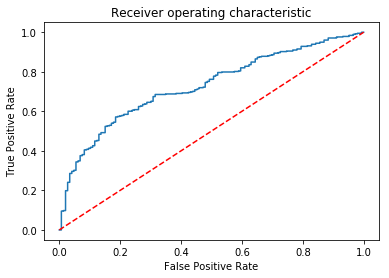

In [147]:
print(rnd_search.best_params_) 

y_pred = rnd_search.predict(X_test)
y_prob = rnd_search.predict_proba(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred)) 
fpr, tpr, _ = metrics.roc_curve(y_test,y_prob[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color = 'red',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print("AUC:",roc_auc_score(y_test,y_prob[:,1]))